In [1]:
#1. Load the data :
import pandas as pd
dataset=pd.read_excel('/content/1553768847_housing.xlsx')

In [2]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
dataset.duplicated().sum()

0

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
#2. Handle missing values :
dataset['total_bedrooms']=dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean())
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [6]:
#3. Encode categorical data :
from sklearn.preprocessing import LabelEncoder
dataset['ocean_proximity']=LabelEncoder().fit_transform(dataset['ocean_proximity'])

In [7]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [8]:
x=dataset.drop(['median_house_value'],axis=1)
y=dataset['median_house_value']

In [9]:
#4. Split the dataset :
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [10]:
#5. Standardize data :
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(xtrain)
x_test=StandardScaler().fit_transform(xtest)

In [11]:
#6. Perform Linear Regression :
from sklearn.linear_model import LinearRegression
linreg=LinearRegression().fit(x_train,ytrain)
pred=linreg.predict(xtest)

from sklearn.metrics import mean_squared_error
import numpy as np
mse=np.sqrt(mean_squared_error(ytest,pred))
mse

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


89949556.81676571

In [12]:
#7. Perform Decision Tree Regression :
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor().fit(x_train,ytrain)
pred=tree.predict(xtest)

from sklearn.metrics import mean_squared_error
import numpy as np
mse=np.sqrt(mean_squared_error(ytest,pred))
mse

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


207553.83212771776

In [17]:
#8. Perform Random Forest Regression :
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=100).fit(x_train,ytrain)
pred=rfc.predict(xtest)

from sklearn.metrics import mean_squared_error
import numpy as np
mse=np.sqrt(mean_squared_error(ytest,pred))
mse

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


210979.4841906281

In [29]:
#9. Bonus exercise: Perform Linear Regression with one independent variable :

x_train=pd.DataFrame(xtrain['median_income'])
x_test=pd.DataFrame(xtest['median_income'])

from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor().fit(x_train,ytrain)
pred=tree.predict(x_test)

from sklearn.metrics import mean_squared_error
import numpy as np
mse=np.sqrt(mean_squared_error(ytest,pred))
mse

106474.06756082732

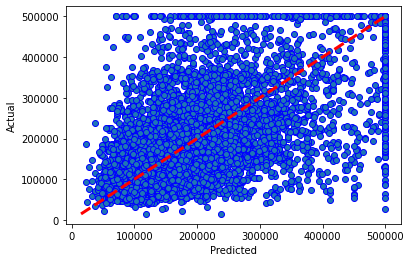

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(pred, ytest, edgecolors=(0, 0, 1))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()